# DA - March Machine Learning Mania 2017

## Get the stats for the teams playing in 2017

In [2]:
import numpy as np
import pandas as pd

In [172]:
#teams_df = pd.read_csv('dataset/Teams2017.csv')
teams_df = pd.read_csv('dataset/Teams.csv')
print(teams_df.head())
print(teams_df.tail())

   Team_Id    Team_Name
0     1101  Abilene Chr
1     1102    Air Force
2     1103        Akron
3     1104      Alabama
4     1105  Alabama A&M
     Team_Id      Team_Name
359     1460      Wright St
360     1461        Wyoming
361     1462         Xavier
362     1463           Yale
363     1464  Youngstown St


In [165]:
# Parse files with stats
stats_df = pd.DataFrame()
all_stats_df = pd.DataFrame()
for yy in range(2,16):
    stats_df = pd.read_csv('dataset/'+'{:02d}'.format(yy)+'PCBR.csv')
    stats_df['Season'] = int('20{:02d}'.format(yy))
    stats_df['TName'] = stats_df['Team'].str.replace(r'\xc2\xa0[0-9]+','')
    stats_df = pd.merge(stats_df, teams_df, how='left', left_on='TName', right_on='Team_Name')
    all_stats_df = pd.concat([all_stats_df, stats_df])

In [166]:
# Show just a count of teams after the join
print('Unique matched teams: {}'.format(all_stats_df['Team_Name'].unique().size))
print('Not matched teams:')
all_stats_df.loc[all_stats_df['Team_Id'].isnull()]['TName'].unique()

Unique matched teams: 50
Not matched teams:


array(['Oklahoma', 'Indiana', 'Illinois', 'Kent St.', 'Stanford',
       'Pittsburgh', 'Ohio St.', 'Connecticut', 'North Carolina St.',
       'Alabama', 'Georgia', 'Mississippi St.', 'Texas', 'Missouri',
       'Texas Tech', 'Michigan St.', 'Memphis', 'Mississippi',
       'Georgetown', 'California', 'Oklahoma St.', 'Charlotte', 'Tulsa',
       'Western Kentucky', 'Utah', 'Iowa', 'Valparaiso', 'Temple',
       'Southern Illinois', 'Hawaii', 'Tennessee', 'Ball St.', 'Syracuse',
       'Penn', 'Bowling Green', 'Pepperdine', 'BYU', 'Louisiana Tech',
       'LSU', 'Wyoming', "Saint Joseph's", 'Arizona St.', 'Georgia Tech',
       'Boston College', 'Tennessee Tech', 'South Florida',
       'San Diego St.', 'Utah St.', "St. John's", 'UC Santa Barbara',
       'St. Bonaventure', 'College of Charleston', 'Richmond', 'UNLV',
       'Fresno St.', 'Saint Louis', 'Colorado', 'Auburn',
       'East Tennessee St.', 'UC Irvine', 'New Mexico', 'Milwaukee', 'UAB',
       'New Mexico St.', 'Pacific', '

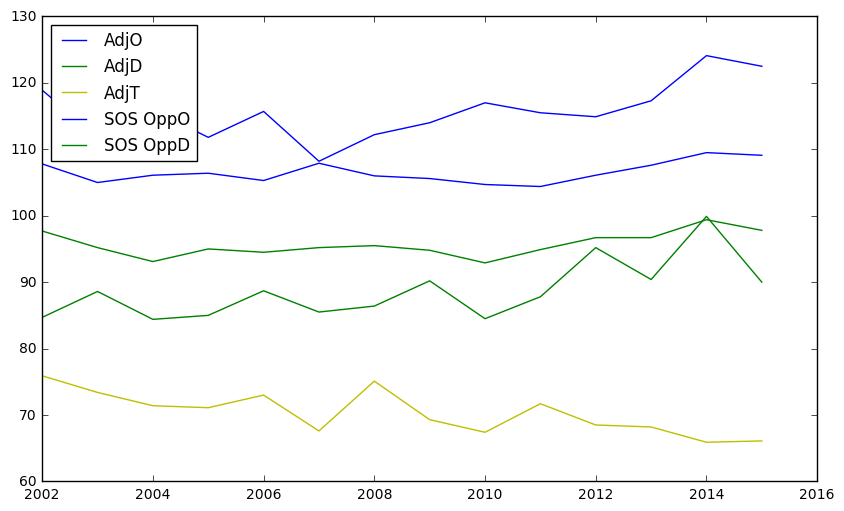

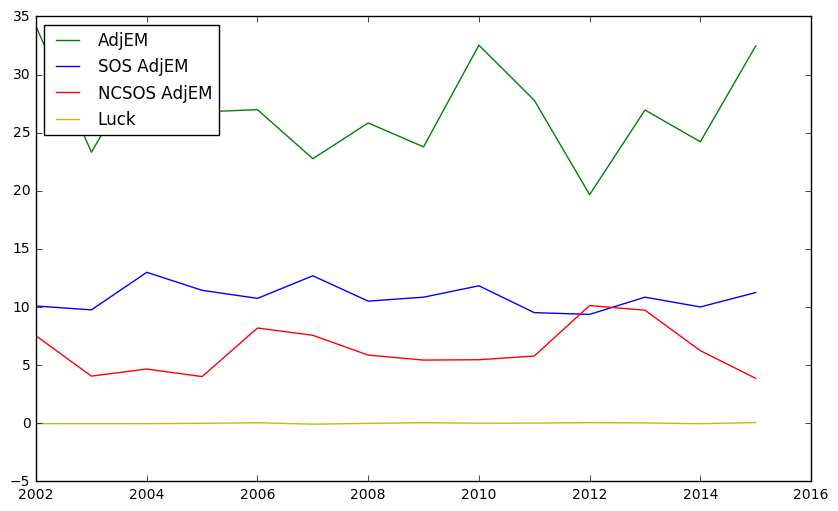

In [163]:
# Plot some stats
import matplotlib.pyplot as plt

curr_stats_df = all_stats_df.loc[all_stats_df['TName'] == 'Duke']

# first figure
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
x = curr_stats_df['Season']
# Loop thru some features
for feat, col in [['AdjO','b'], ['AdjD','g'], ['AdjT','y'], ['SOS OppO','b'], ['SOS OppD','g']]:
    y = curr_stats_df[feat]
    plt.plot(x, y, c=col, label=feat)
plt.legend(loc='upper left');

# second figure
fig = plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
#x = curr_stats_df['Season']
# Loop thru some features
for feat, col in [['AdjEM','g'], ['SOS AdjEM','b'], ['NCSOS AdjEM','r'], ['Luck','y']]:
    y = curr_stats_df[feat]
    plt.plot(x, y, c=col, label=feat)
plt.legend(loc='upper left');

plt.show()

In [164]:
all_stats_df.loc[all_stats_df['TName'] == 'Duke']

,Rank,Team,Conf,W-L,AdjEM,AdjO,AdjD,AdjT,Luck,SOS AdjEM,SOS OppO,SOS OppD,NCSOS AdjEM,Season,TName,Team_Id,Team_Name
0,1,Duke 1,ACC,31-4,34.14,118.9,84.7,75.9,-0.027,10.09,107.8,97.7,7.52,2002,Duke,1181.0,Duke
5,6,Duke 3,ACC,26-7,23.32,111.9,88.6,73.4,-0.030,9.76,105.0,95.2,4.06,2003,Duke,1181.0,Duke
0,1,Duke 1,ACC,31-6,31.51,115.9,84.4,71.4,-0.028,12.99,106.1,93.1,4.67,2004,Duke,1181.0,Duke
2,3,Duke 1,ACC,27-6,26.79,111.8,85.0,71.1,-0.002,11.44,106.4,95.0,4.02,2005,Duke,1181.0,Duke
1,2,Duke 1,ACC,32-4,26.98,115.7,88.7,73.0,0.048,10.75,105.3,94.5,8.20,2006,Duke,1181.0,Duke
9,10,Duke 6,ACC,22-11,22.76,108.2,85.5,67.6,-0.073,12.69,107.9,95.2,7.57,2007,Duke,1181.0,Duke
5,6,Duke 2,ACC,28-6,25.84,112.2,86.4,75.1,-0.006,10.51,106.0,95.5,5.87,2008,Duke,1181.0,Duke
8,9,Duke 2,ACC,30-7,23.78,114.0,90.2,69.3,0.053,10.85,105.6,94.8,5.44,2009,Duke,1181.0,Duke
0,1,Duke 1,ACC,35-5,32.53,117.0,84.5,67.4,0.009,11.83,104.7,92.9,5.47,2010,Duke,1181.0,Duke
2,3,Duke 1,ACC,32-5,27.79,115.5,87.8,71.7,0.018,9.52,104.4,94.9,5.79,2011,Duke,1181.0,Duke


In [177]:
# Parse files with stats
stats_df = pd.DataFrame()
r_stats_df = pd.DataFrame()
for yy in range(2,16):
    stats_df = pd.read_csv('dataset/'+'{:02d}'.format(yy)+'PCBR.csv')
    stats_df['Season'] = int('20{:02d}'.format(yy))
    #stats_df['TName'] = stats_df['Team'].str.replace(r'\xc2\xa0[0-9]+','')
    stats_df['TName'] = stats_df['Team'].str.replace(r'.', '')
    stats_df = pd.merge(stats_df, teams_df, how='right', left_on='TName', right_on='Team_Name')
    r_stats_df = pd.concat([r_stats_df, stats_df])

In [178]:
# Show just a count of teams after the join
print('Unique matched teams: {}'.format(r_stats_df['TName'].unique().size))
print('Not matched teams:')
r_stats_df.loc[r_stats_df['TName'].isnull()]['Team_Name'].unique()

Unique matched teams: 266
Not matched teams:


array(['Abilene Chr', 'Alabama', 'Albany NY', 'Alcorn St', 'Alliant Intl',
       'American Univ', 'Arizona', 'Ark Little Rock', 'Ark Pine Bluff',
       'Armstrong St', 'Augusta', 'Bethune-Cookman', 'Birmingham So',
       'Boston College', 'Boston Univ', 'Brooklyn', 'Bryant', 'C Michigan',
       'Cal Poly SLO', 'California', 'Cent Arkansas', 'Central Conn',
       'Charleston So', 'Charlotte', 'Cincinnati', 'Citadel',
       'Coastal Car', 'Col Charleston', 'Connecticut', 'Creighton',
       'CS Bakersfield', 'CS Fullerton', 'CS Northridge', 'CS Sacramento',
       'Davidson', 'Duke', 'E Illinois', 'E Kentucky', 'E Michigan',
       'E Washington', 'Edwardsville', 'ETSU', 'F Dickinson',
       'FL Atlantic', 'FL Gulf Coast', 'Florida', 'Florida Intl',
       'G Washington', 'Ga Southern', 'Georgia', 'Gonzaga', 'Grambling',
       'Grand Canyon', 'Hampton', 'Hardin-Simmons', 'Hawaii', 'Holy Cross',
       'Houston Bap', 'IL Chicago', 'Illinois', 'Incarnate Word',
       'Indiana', 'K